#Primer punto 
### Codigo inspirado en repositorio de la clase

In [1]:
## Importamos el data Frame
import pandas as pd
data = pd.read_csv("iris.data", names=['sepal lenght', 'sepal width',"petal lenght","petal width","classe"])
data.head()

,sepal lenght,sepal width,petal lenght,petal width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Eliminamos las filas en que la columna es Iris Virgnica porque no vamos a usarla
indexNames = data[ (data['classe'] == "Iris-virginica") ].index
data.drop(indexNames , inplace=True)

In [3]:
#Convertir las clases en 0 a 1
data.loc[data.classe=="Iris-versicolor","classe"]=1
data.loc[data.classe=="Iris-setosa","classe"]=0

In [4]:
import matplotlib.pyplot as plt


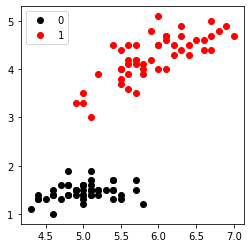

In [5]:
# Se toman las caracteristicas de sepal lenght y petal lenght
x1 = data['sepal lenght']
x2 = data['petal lenght']
y = data['classe']
Y = data['classe']
class_0 = y == 0 
class_1 = y == 1 

fig = plt.figure(figsize=(4,4))
plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')

plt.legend()
plt.show()

In [6]:
#-- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

In [7]:
import numpy as np


Epoch [1/15], bias: 0.0, w1: 0.9500000000000002, w2: 1.6500000000000001


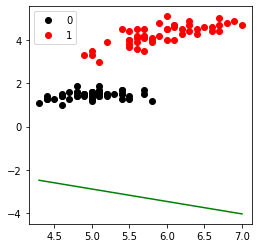

Epoch [2/15], bias: 0.0, w1: 1.9000000000000004, w2: 3.3000000000000003


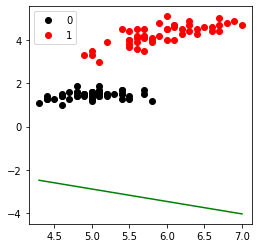

Epoch [3/15], bias: -0.5, w1: 0.5500000000000007, w2: 4.200000000000001


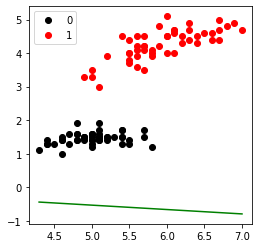

Epoch [4/15], bias: -0.5, w1: 0.850000000000001, w2: 5.250000000000001


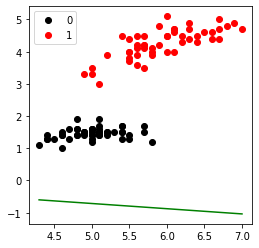

Epoch [5/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


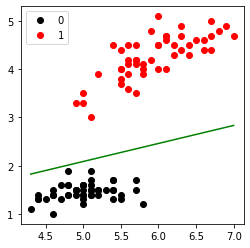

Epoch [6/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


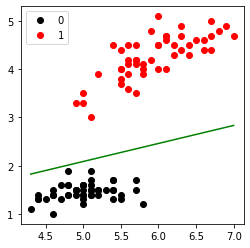

Epoch [7/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


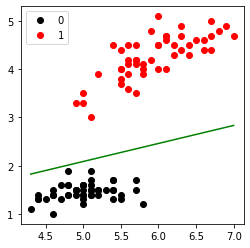

Epoch [8/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


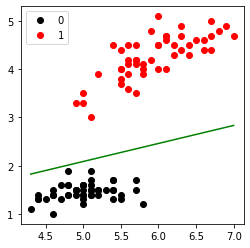

Epoch [9/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


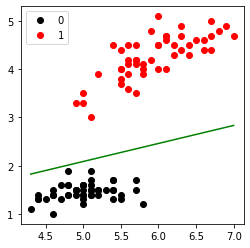

Epoch [10/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


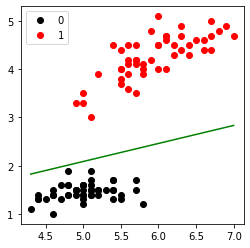

Epoch [11/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


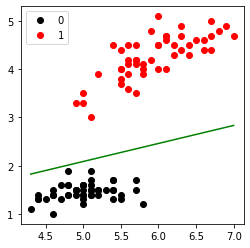

Epoch [12/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


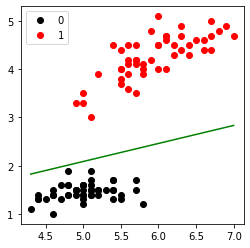

Epoch [13/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


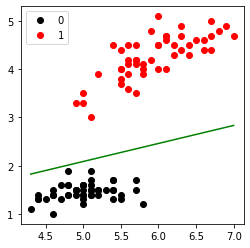

Epoch [14/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


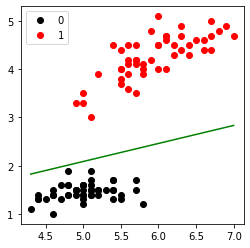

Epoch [15/15], bias: -1.0, w1: -1.6999999999999988, w2: 4.550000000000001


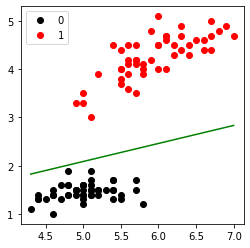

In [8]:
#-- Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 15 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Esta es la función nuestro perceptron encontrará al final de todas las épocas
def y(x):
 return -(b + w_1*x)/w_2

# Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(x1,x2,Y):
    
    # Función de Suma
    z = i*w_1 + j*w_2 + b

    # Función de Activación
    sig_z = act(z)

    # Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
    
    # Calculamos el error
    error = k - out

    # Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

  fig = plt.figure(figsize=(4,4))
  plt.plot(x1[class_0],x2[class_0],'o', c='black', label='0')
  plt.plot(x1[class_1],x2[class_1],'o', c='red', label='1')
  plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green',)

  plt.legend()
  plt.show()

## Se realiza el entrenamiento y se logra crear una funcion que diferencia entre las dos clases con las dos caracteristicas

#Segundo punto

In [9]:
#Leemos el data frame
data = pd.read_csv("iris.data", names=['sepal lenght', 'sepal width',"petal lenght","petal width","classe"])
data.head()

,sepal lenght,sepal width,petal lenght,petal width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#Organizamos X y Y 
X = data.drop(['classe'], axis = 'columns')
Y = data['classe']


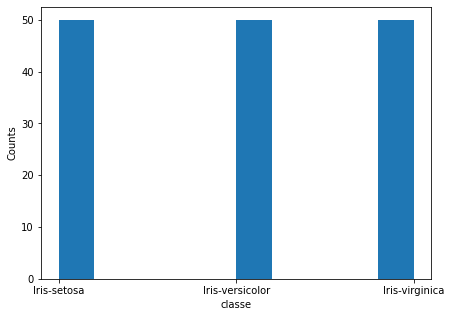

In [11]:
#Graficamos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
plt.hist(Y)
plt.ylabel('Counts')
plt.xlabel('classe')
plt.show()

In [12]:
#--- Dividimos nuestro dataset en Train/Test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [13]:
#--- Cargamos MLPCLassifier para buscar un modelo con 2 capas

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(1, 3), solver='adam', learning_rate_init=0.1,random_state=1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 3), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
#--- Entrenamos el modelo y realizamos una predicción

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [15]:

Y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype='<U15')

In [16]:

#--- Evaluamos el modelo con el accuracy_score
from sklearn.metrics import accuracy_score

accuracy_score(Y_pred,Y_test)

0.2894736842105263

In [17]:
#--- Cargamos MLPCLassifier para buscar un modelo con 3 capas

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu',  hidden_layer_sizes=(1, 3,2), solver='adam', learning_rate_init=0.1,random_state=1)
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1, 3, 2), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
#--- Entrenamos el modelo y realizamos una predicción

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [19]:

Y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype='<U15')

In [20]:

accuracy_score(Y_pred,Y_test)

0.7894736842105263

## Notemos que para 3 capas es 0.78 y para 2 capas 0.28. Sin embargo con diferentes pruebas podemos darnos cuenta que no solo importa el numero de capas sino las neuronas